In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def subdivide(line, res):
        #line: Nx2
        out_line = []
        for i in range(len(line)-1):
            firstP  = line[i] #2D point
            secondP = line[i+1] #2D point
            out_line.append(firstP) # first appending

            # compute the line equation
            inf_slope = False
            if secondP[0] == firstP[0]:
                inf_slope = True
            else:
                m = (secondP[1]-firstP[1]) / (secondP[0]-firstP[0]) #slope
                h = firstP[1] - m*firstP[0] #y-intercept

            kx1, kx2 = firstP[0]//res, secondP[0]//res
            ky1, ky2 = firstP[1]//res, secondP[1]//res
            Mx, My = abs(kx1 - kx2), abs(ky1 - ky2)
            for sx in range(Mx):
                boundX = res * (min(kx1, kx2) + sx + 1)
                boundY = m * boundX + h
                out_line.append([boundX, boundY])
            for sy in range(My):
                boundY = res * (min(ky1, ky2) + sy + 1)
                if inf_slope: # only in My inf_slope might happen
                    boundX = firstP[0]
                else:
                    boundX = (boundY - h) / m
                out_line.append([boundX, boundY])

        out_line.append(line[-1]) # also include the last point
        return np.array(out_line, np.int32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


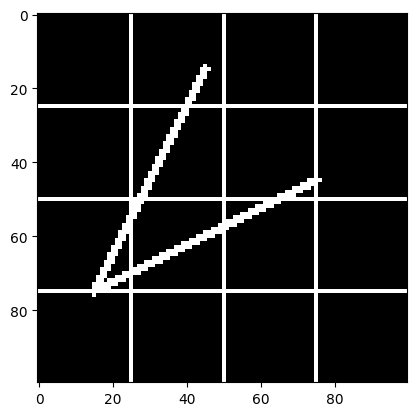

In [11]:
image = np.zeros((100,100,3))
res = 25
for i in range(1, 4):  # Start from 1 to avoid the first line at index 0
    x = i * res
    cv2.line(image, (x, 0), (x, 100), (255, 255, 255), 1)  # White line

# Draw horizontal lines
for i in range(1, 4):
    y = i * res
    cv2.line(image, (0, y), (100, y), (255, 255, 255), 1)  # White line


line = [[75, 45], [15,75], [45, 15]]
cv2.line(image, line[0], line[1], (255,255,255), 2)
cv2.line(image, line[1], line[2], (255,255,255), 2)
plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


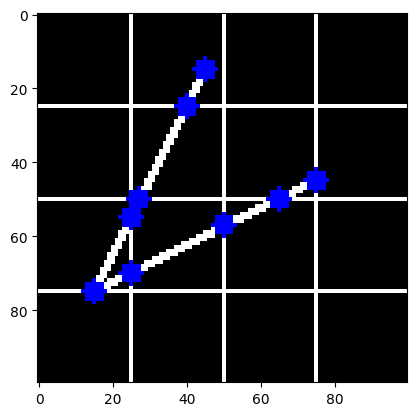

In [12]:
new_line = subdivide(line, res)
for p in new_line:
    cv2.circle(image, p, radius=3, color=(0, 0,255), thickness=-1)
plt.imshow(image)
plt.show()